In [129]:
# load general packages
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
from model_dc_multidim import model_dc_multidim
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
t0 = time.time()  # set the starting time
model = model_dc_multidim()
model.setup()
model.create_grids()
model.solve()
t1 = time.time() # set the ending time
par = model.par
sol = model.sol
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 22.839061 seconds


In [111]:
# Figure
def figure_multi_dim(par,sol,h,i_k):
    k = par.grid_k[i_k]
    #print(par.grid_k[150])
    if h == 0:
        print(f'Not working')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40]
        print(f'k={k:.3}')
    elif h == 0.5:
        print(f'Working part-time')
        print(f'k={k:.3}')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40]
    elif h == 1:
        print(f'Working full-time')
        print(f'k={k:.3}')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,h,:,i_k], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,h_{{t}} = {h}, k = {k:.3})$")
    ax.set_xlim([0,10])
    ax.set_ylim([0,10])
    ax.set_title(f'Consumption function')
    plt.legend()
    plt.show()

Not working
k=1.44


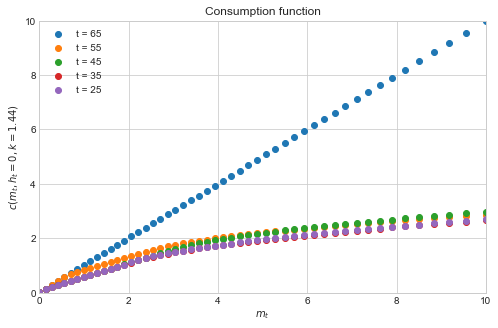

Working full-time
k=1.44


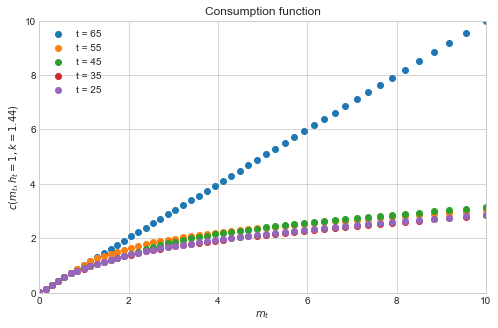

Not working
k=10.0


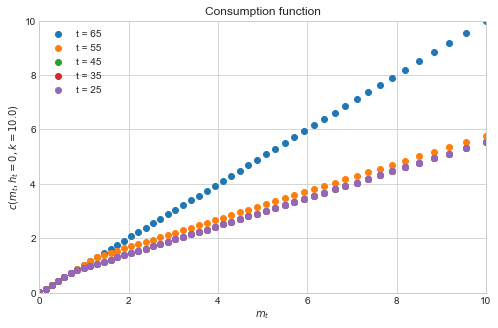

Working full-time
k=10.0


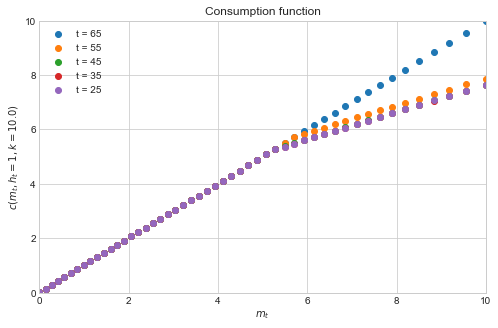

In [112]:
figure_multi_dim(model.par,model.sol,0,10)
figure_multi_dim(model.par,model.sol,1,10)
figure_multi_dim(model.par,model.sol,0,49)
figure_multi_dim(model.par,model.sol,1,49)

In [133]:
def figure(par,sol,h,i_k):
    k = par.grid_k[i_k]
    if h == 0:
        print(f'Not working')
        ts = [par.T, par.T-10, par.T-19, par.T-20, par.T-21, par.T-22, par.T-23, par.T-24, par.T-25]
        print(f'k={k:.3} (i_k={i_k})')
    elif h == 0.5:
        print(f'Working part-time')
        print(f'k={k:.3} (i_k={i_k})')
        ts = [par.T, par.T-10, par.T-19, par.T-20, par.T-21, par.T-22, par.T-23, par.T-24, par.T-25]
    elif h == 1:
        print(f'Working full-time')
        print(f'k={k:.3} (i_k={i_k})')
        ts = [par.T, par.T-10, par.T-19, par.T-20, par.T-21, par.T-22, par.T-23, par.T-24, par.T-25]
    fig = plt.figure(figsize=(15,5))
    
    ax = fig.add_subplot(1,2,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,h,:,i_k], label=f't = {i}, age = {i+20}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,h = {h}), k={k:.3}$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_title(f'Consumption function')
    plt.legend()

    ax = fig.add_subplot(1,2,2)
    for i in ts:
        ax.scatter(par.grid_m,sol.v[i-1,h,:,i_k], label=f't = {i}, age = {i+20}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$v(m_t,h = {h}), k={k:.3}$")
    ax.set_xlim([0, 10])
    ax.set_ylim([-10, 40])
    ax.set_title(f'´Value function')
    plt.legend()
    plt.show()

sigma_epsilon = 0.5
time: 19.387776 seconds
Not working
k=0.704 (i_k=5)


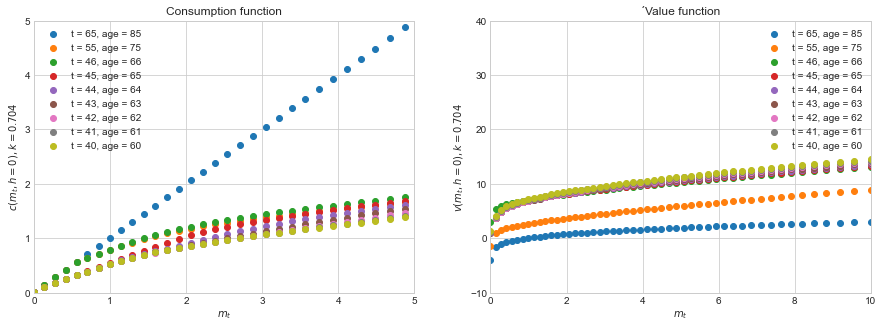

In [134]:
model = model_dc_multidim()
sigma_epsilon = [0.5]
#sigma_epsilon = [0.0,0.01,0.1,0.2,0.3]
#sigma_epsilon = [0.0,0.01,0.1,0.2,0.5]

for i,val in enumerate(sigma_epsilon):
    t0 = time.time()
    model.setup()
    model.par.sigma_epsilon = val
    model.create_grids()
    model.solve()
    print(f'sigma_epsilon = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure(model.par,model.sol,0,5)
    #figure(model.par,model.sol,0,3)
    #figure(model.par,model.sol,0,10)
    #figure(model.par,model.sol,1,30)
    #print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    #figure(model.par,model.sol,1,20)
    #print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    #figure(model.par,model.sol,1,20)

P = 0
time: 19.700598 seconds
Not working
k=1.14 (i_k=8)


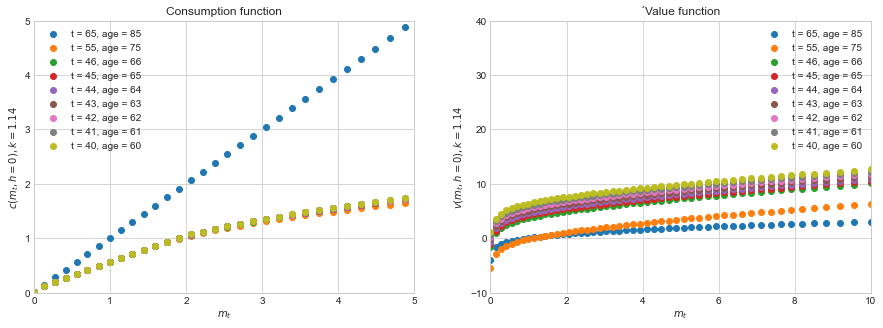

P = 0.1
time: 20.462244 seconds
Not working
k=1.14 (i_k=8)


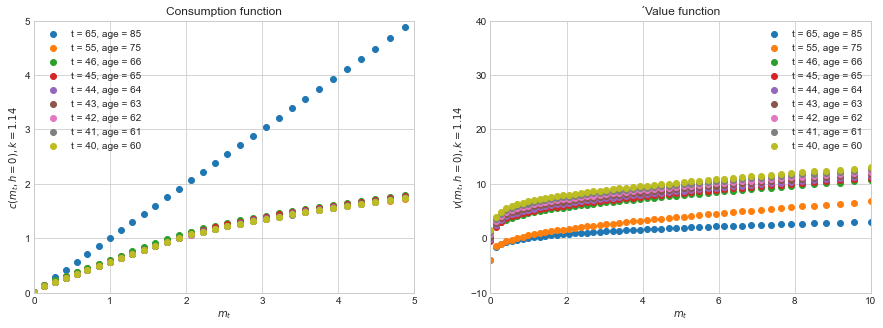

P = 0
time: 19.569208 seconds
Not working
k=1.14 (i_k=8)


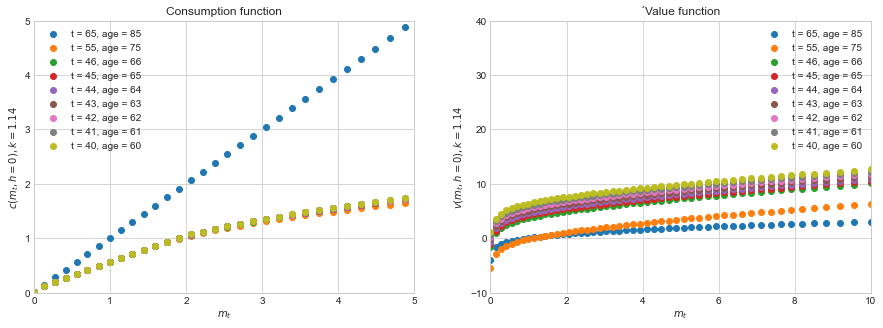

P = 5
time: 23.791152 seconds
Not working
k=1.14 (i_k=8)


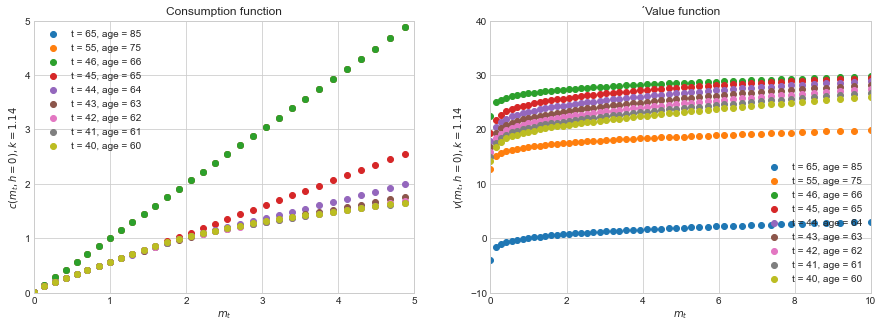

P = 1
time: 18.953377 seconds
Not working
k=1.14 (i_k=8)


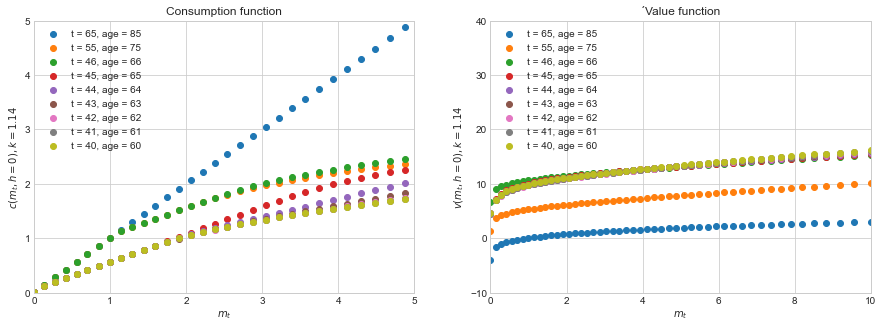

In [136]:
model = model_dc_multidim()
P = [0,0.1,0.5,1]
#sigma_epsilon = [0.0,0.01,0.1,0.2,0.3]
#sigma_epsilon = [0.0,0.01,0.1,0.2,0.5]

for i,val in enumerate(P):
    t0 = time.time()
    model.setup()
    model.par.P = val
    model.create_grids()
    model.solve()
    print(f'P = {val}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure(model.par,model.sol,0,8)

In [120]:
def figure_K(par,sol,h,i_m):
    m = par.grid_m[i_m]
    if h == 0:
        print(f'Not working')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40, par.T-64]
        print(f'm={m:.3} (i_m={i_m})')
    elif h == 0.5:
        print(f'Working part-time')
        print(f'm={m:.3} (i_m={i_m})')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40, par.T-64]
    elif h == 1:
        print(f'Working full-time')
        print(f'm={m:.3} (i_m={i_m})')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40, par.T-64]
    fig = plt.figure(figsize=(15,5))
    
    ax = fig.add_subplot(1,2,1)
    for i in ts:
        ax.scatter(par.grid_k,sol.c[i-1,h,i_m,:], label=f't = {i}')
    ax.set_xlabel(f"$k_t$")
    ax.set_ylabel(f"$c(m={m:.3},h = {h}), k=k_t$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_title(f'Consumption function given K for m={m:.3}')
    plt.legend()

    ax = fig.add_subplot(1,2,2)
    for i in ts:
        ax.scatter(par.grid_k,sol.v[i-1,h,i_m,:], label=f't = {i}')
    ax.set_xlabel(f"$k_t$")
    ax.set_ylabel(f"$v(m={m:.3},h = {h}), k=k_t$$")
    ax.set_xlim([0, 10])
    ax.set_ylim([-10, 40])
    ax.set_title(f'´Value function given K for m={m:.3}')
    plt.legend()
    plt.show()

sigma_epsilon = 0.3
time: 19.436819 seconds
Working full-time
m=1.44 (i_m=10)


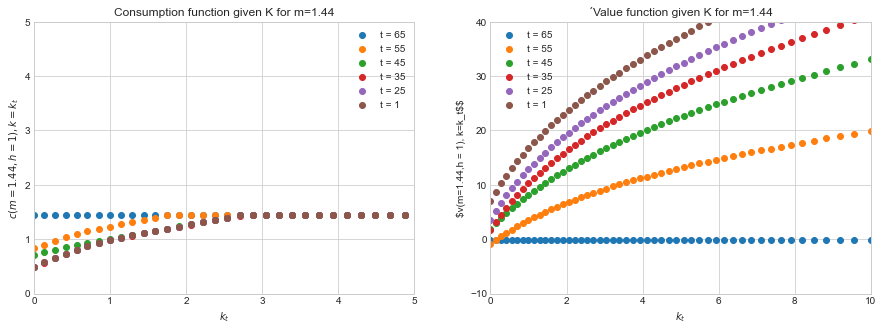

In [121]:
sigma_epsilon = [0.3]
#sigma_epsilon = [0.0,0.01,0.1,0.2,0.3]
#sigma_epsilon = [0.0,0.01,0.1,0.2,0.5]

for i,val in enumerate(sigma_epsilon):
    t0 = time.time()
    model.setup()
    model.par.sigma_epsilon = val
    model.create_grids()
    model.solve()
    print(f'sigma_epsilon = {val:.3}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure_K(model.par,model.sol,1,10)

P = 0.01
time: 20.394992 seconds
Working full-time
k=3.92 (i_k=25)


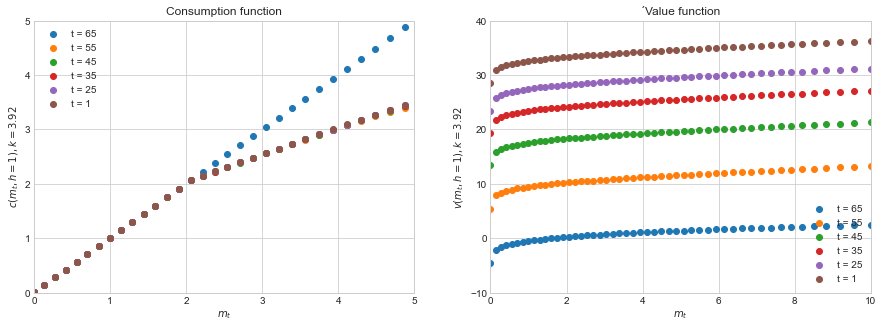

P = 0.5
time: 18.813172 seconds
Working full-time
k=3.92 (i_k=25)


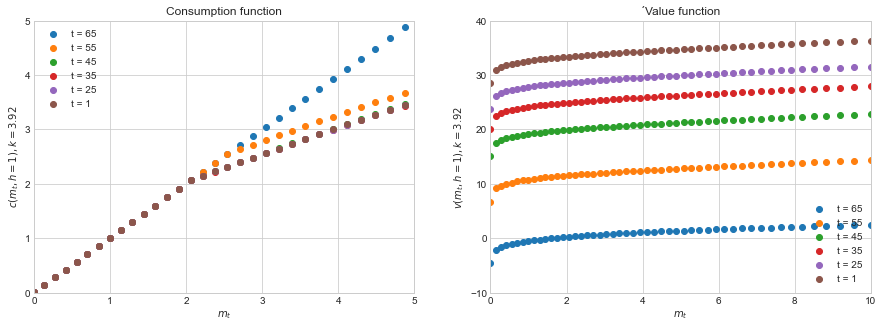

P = 1
time: 18.873554 seconds
Working full-time
k=3.92 (i_k=25)


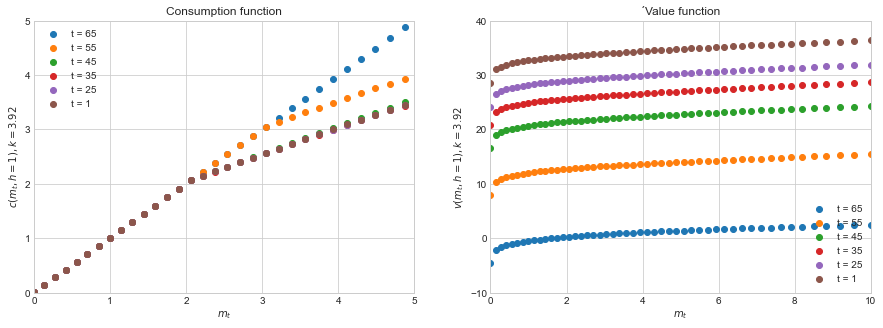

In [123]:
P = [0.01,0.5,1]
#P = [0.0,0.01,0.1,0.2,0.3]
for i,val in enumerate(P):
    t0 = time.time()
    model.setup()
    model.par.P = val
    model.create_grids()
    model.solve()
    print(f'P = {val}')
    t1 = time.time() # set the ending time
    print(f'time: {t1-t0:.8} seconds') # print the total time
    figure(model.par,model.sol,1,25)
    #figure(model.par,model.sol,1,99)
    #print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    #figure(model.par,model.sol,1,20)
    #print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    #figure(model.par,model.sol,1,20)

In [ ]:



#forsøg 2...






In [23]:
def figure(par,sol,h,i_k):
    k = par.grid_k[i_k]
    if h == 0:
        print(f'Not working')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40]
        print(f'k={k:.3}')
    elif h == 0.5:
        print(f'Working part-time')
        print(f'k={k:.3}')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40]
    elif h == 1:
        print(f'Working full-time')
        print(f'k={k:.3}')
        ts = [par.T, par.T-10, par.T-20, par.T-30, par.T-40]
    fig = plt.figure(figsize=(15,5))
    
    ax = fig.add_subplot(1,2,1)
    for i in ts:
        ax.scatter(sol.m[i-1,h,:,i_k],sol.c[i-1,h,:,i_k], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,z_{{t+1}} = {z})$")
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_title(f'Consumption function')
    plt.legend()

    ax_right = fig.add_subplot(1,2,2)
    for i in ts:
        ax_right.scatter(sol.m[i-1,h,:,i_k],sol.v[i-1,h,:,i_k], label=f't = {i}')
    ax_right.set_xlabel(f"$m_t$")
    ax_right.set_ylabel(f"$v(m_t,z_{{t+1}} = {z})$")
    ax_right.set_xlim([0, 100])
    ax_right.set_ylim([-100,100])
    ax_right.set_title(f'Value function')
    plt.legend()

    plt.show()

In [ ]:
model = model_dc_multidim()
sigma_epsilon = [0.0,0.05,0.1,0.2,0.3,0.5]

for i,val in enumerate(sigma_epsilon):
    model.setup()
    model.par.sigma_epsilon = val
    model.create_grids()
    model.solve()
    print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    figure(model.par,model.sol,0,20)
    #print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    #figure(model.par,model.sol,1,20)
    #print(f'sigma_epsilon = {par.sigma_epsilon:.3}')
    #figure(model.par,model.sol,1,20)